**----------------------------------------------------------------------------------------------------------------MAIN FORECASTING-------------------------------------------------------------------------------------------------------------------**

**BLOCK 1**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

**BLOCK 2**

In [40]:
# Load the dataset and strip column names of extra spaces
data = pd.read_excel(r"C:\Users\KARTHIKEYA\Desktop\Mini Project\Datasets\COAL Consumption.xlsx")
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

# Display the first few rows and check column names
print("Columns in dataset:", data.columns)
print(data.head())

# Ensure 'Year' is in datetime format and set as index
if 'Year' in data.columns:
    data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')
    data.set_index('Year', inplace=True)
else:
    print("Error: 'Year' column not found!")

# Identify correct column name for coal consumption
coal_col = None
for col in data.columns:
    if "coal consumption" in col.lower():  # Case-insensitive match
        coal_col = col
        break

if coal_col:
    time_series = data[coal_col]
    print("Coal Consumption Data Extracted Successfully")
else:
    print("Error: Coal Consumption column not found! Available columns:", data.columns)


Columns in dataset: Index(['Entity', 'Year', 'Coal consumption - TWh'], dtype='object')
   Entity  Year  Coal consumption - TWh
0  Africa  1965               323.49615
1  Africa  1966               323.12220
2  Africa  1967               330.29156
3  Africa  1968               343.51290
4  Africa  1969               346.64288
Coal Consumption Data Extracted Successfully


**BLOCK 3**

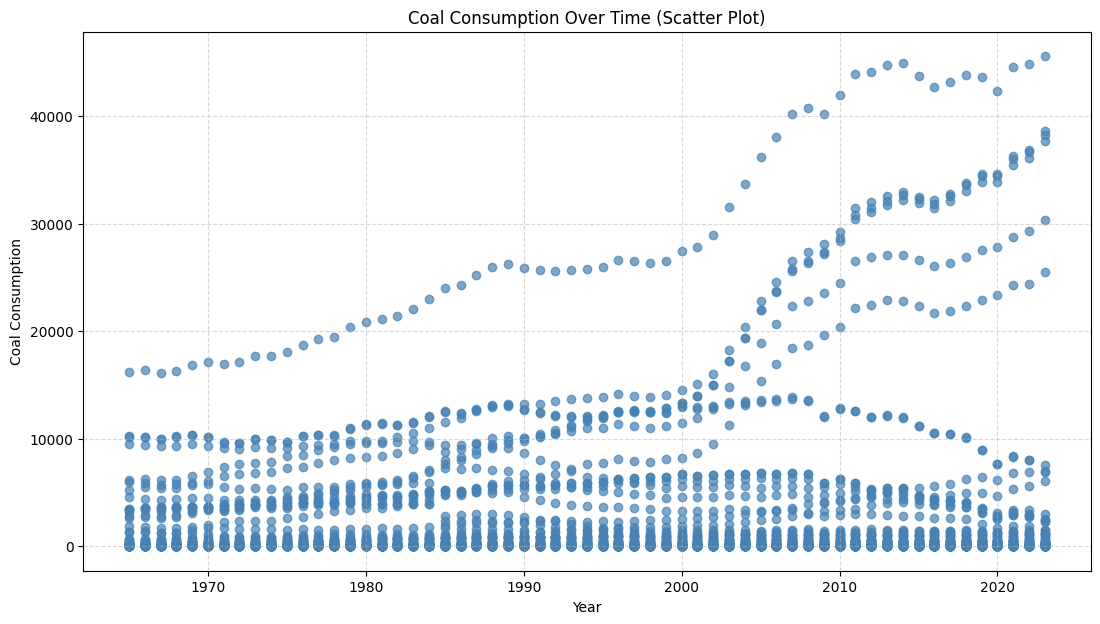

In [44]:
#SCATTER PLOT SHOWING CONSUMPTION OF COAL FROM 1965 - 2023

plt.figure(figsize=(13, 7))
plt.scatter(time_series.index, time_series, color='steelblue', alpha=0.7)
plt.title("Coal Consumption Over Time (Scatter Plot)")
plt.xlabel("Year")
plt.ylabel("Coal Consumption")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**BLOCK 4**

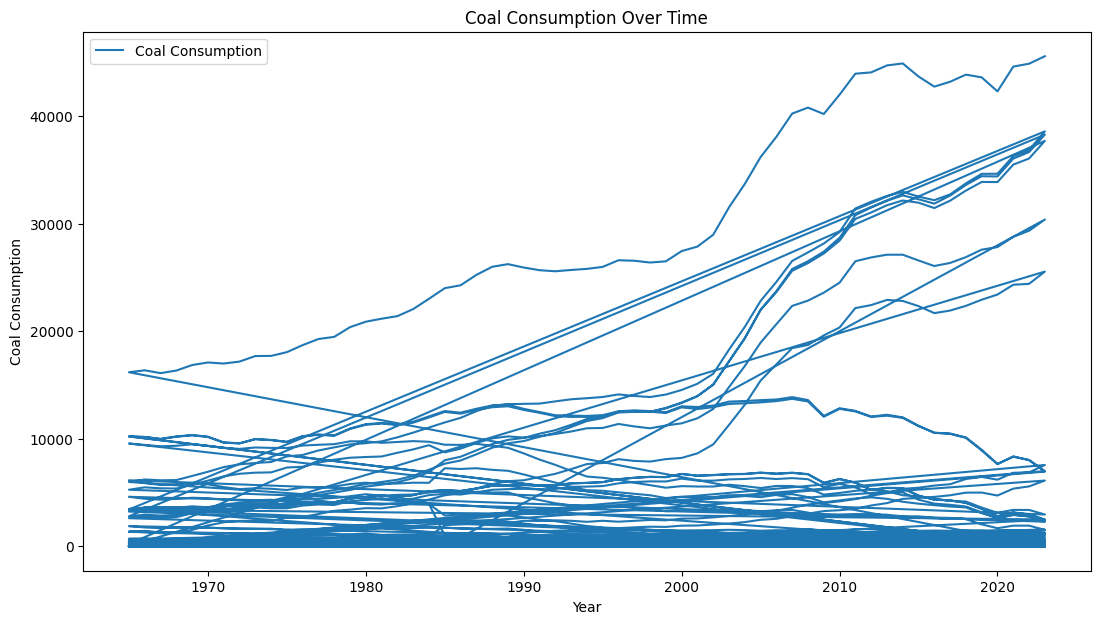

In [42]:
#TIME SERIES PLOT(LINE GRAPH) SHOWING CONSUMPTION OF COAL FROM 1965 - 2023
# Visualize the data
plt.figure(figsize=(13, 7))
plt.plot(time_series, label="Coal Consumption")
plt.title("Coal Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Coal Consumption")
plt.legend()
plt.show()

**BLOCK 5**

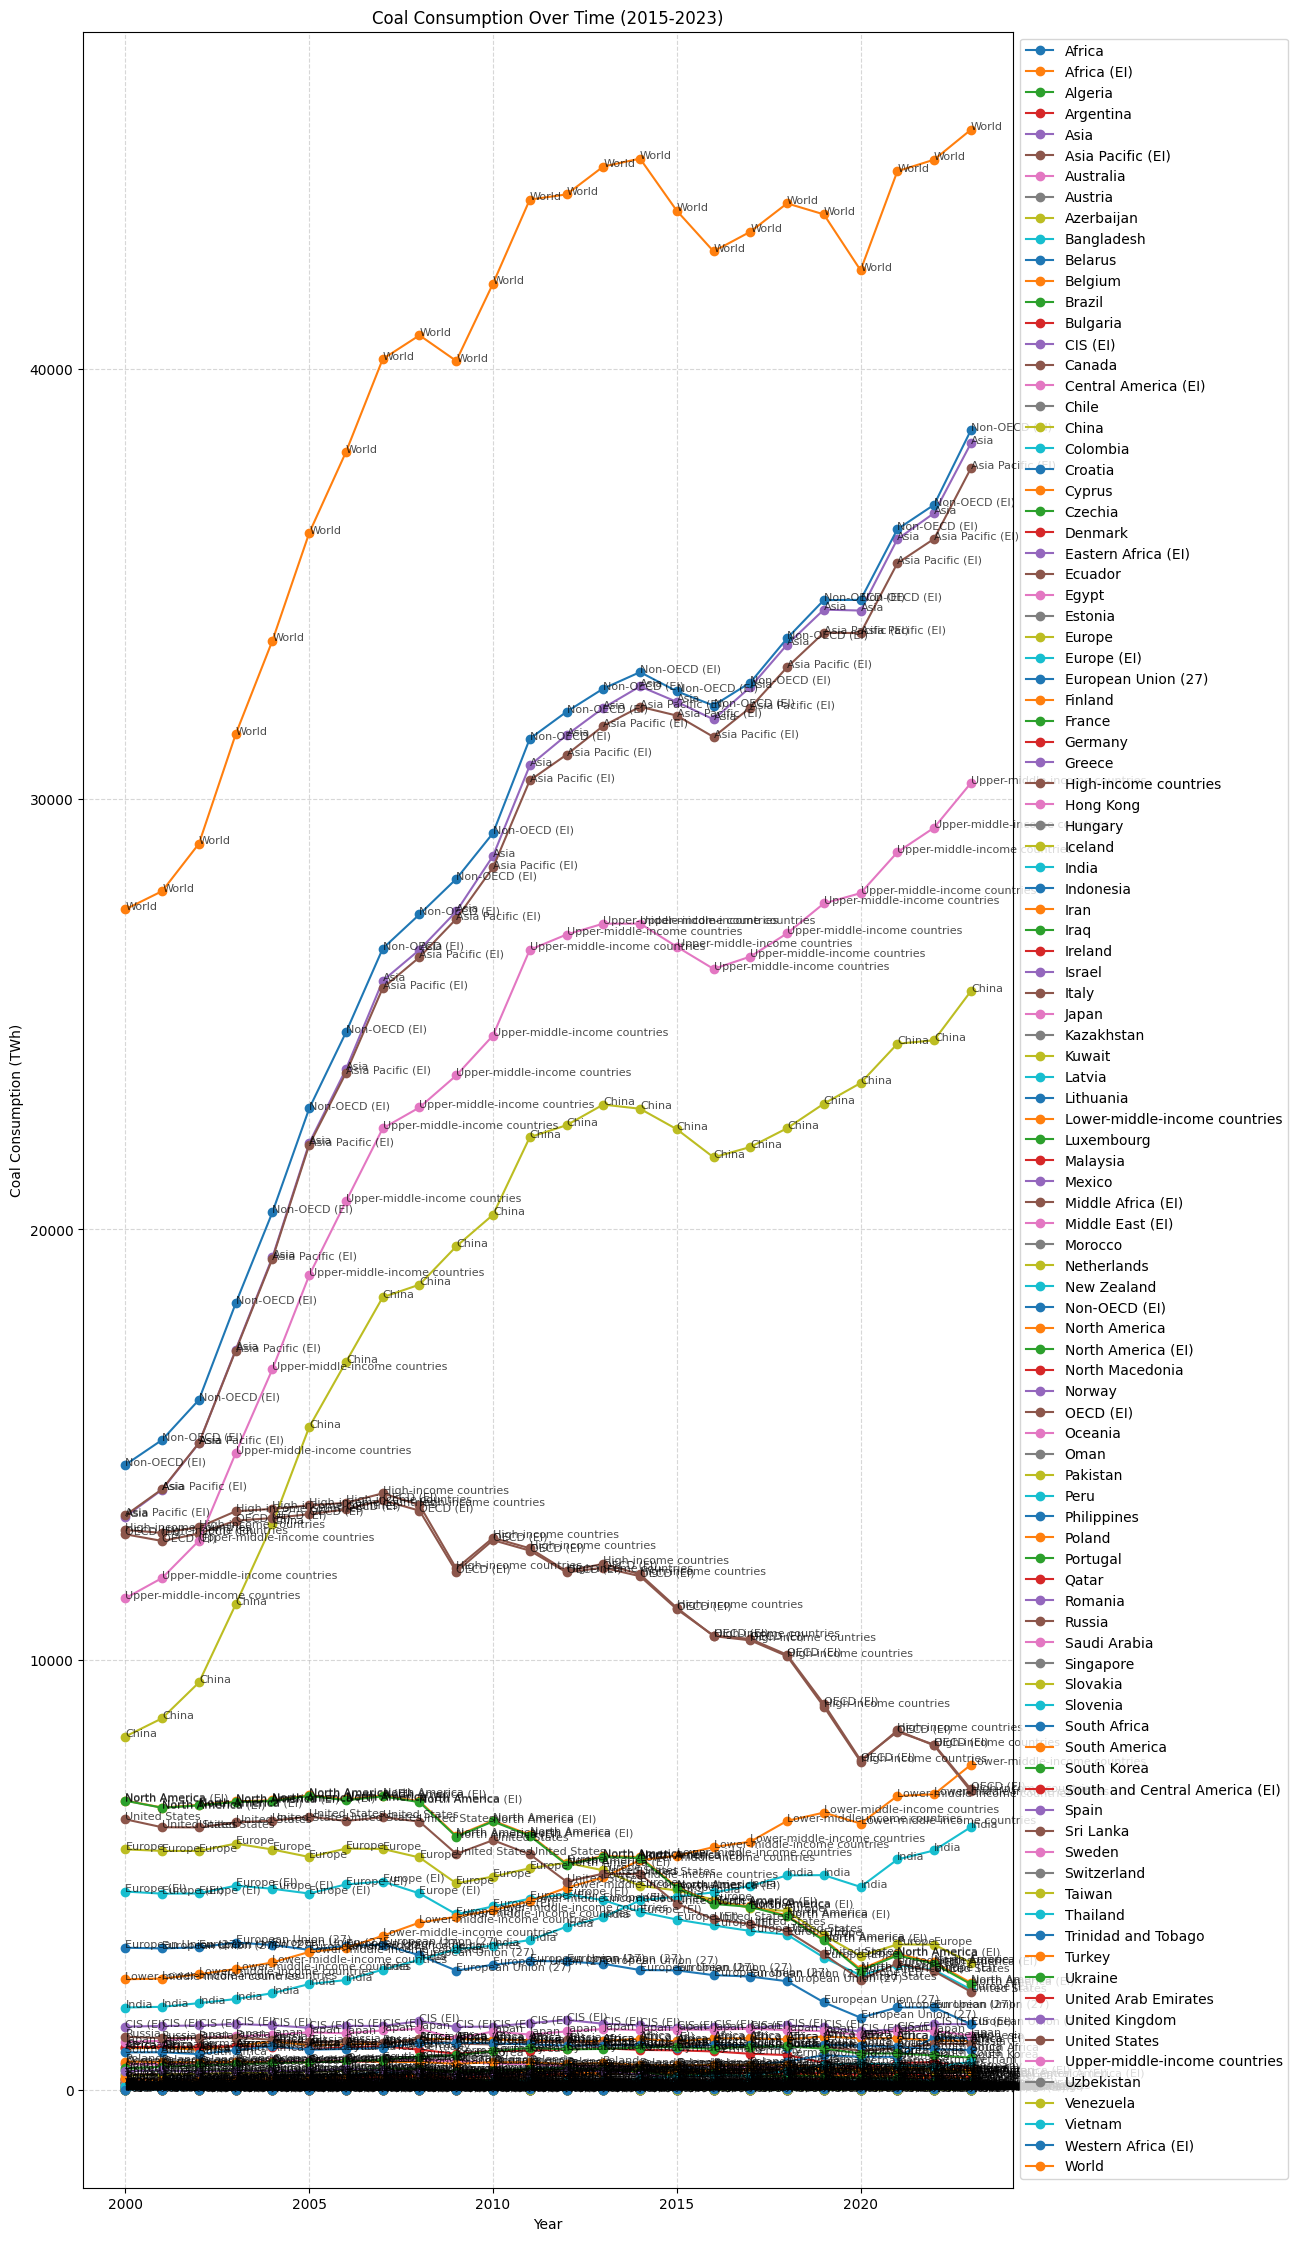

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (ensure data is properly loaded before proceeding)
# data = pd.read_csv("your_file.csv")  # Uncomment and update this line if reading from a CSV file

# Strip column names of extra spaces and check their existence
data.columns = data.columns.str.strip()

# Ensure "Year" column exists
if "Year" not in data.columns:
    print("Error: 'Year' column not found in dataset.")
else:
    # Convert "Year" to numeric in case it's stored as a string
    data["Year"] = pd.to_numeric(data["Year"], errors="coerce")

    # Filter for years 2015-2023
    start_year, end_year = 2000, 2023
    filtered_data = data[(data["Year"] >= start_year) & (data["Year"] <= end_year)]

    # Ensure "Entity" and "Coal consumption - TWh" exist
    required_columns = {"Entity", "Coal consumption - TWh"}
    if not required_columns.issubset(filtered_data.columns):
        print(f"Error: Missing columns {required_columns - set(filtered_data.columns)} in dataset.")
    else:
        # Get unique countries
        countries = filtered_data["Entity"].unique()

        # Plot multiple countries with different colors
        plt.figure(figsize=(12, 28))

        for country in countries:
            country_data = filtered_data[filtered_data["Entity"] == country]
            plt.plot(country_data["Year"], country_data["Coal consumption - TWh"], label=country, marker='o')

        # Scatter plot with country labels
        for _, row in filtered_data.iterrows():
            plt.text(row["Year"], row["Coal consumption - TWh"], row["Entity"], fontsize=8, alpha=0.7)

        # Improve visualization
        plt.title("Coal Consumption Over Time (2015-2023)")
        plt.xlabel("Year")
        plt.ylabel("Coal Consumption (TWh)")
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.grid(True, linestyle="--", alpha=0.5)

        # Show plot
        plt.show()


**BLOCK 6**

ADF Test Results:
p-value: 0.0001243455084765197
THE DATA IS STATIONARY.


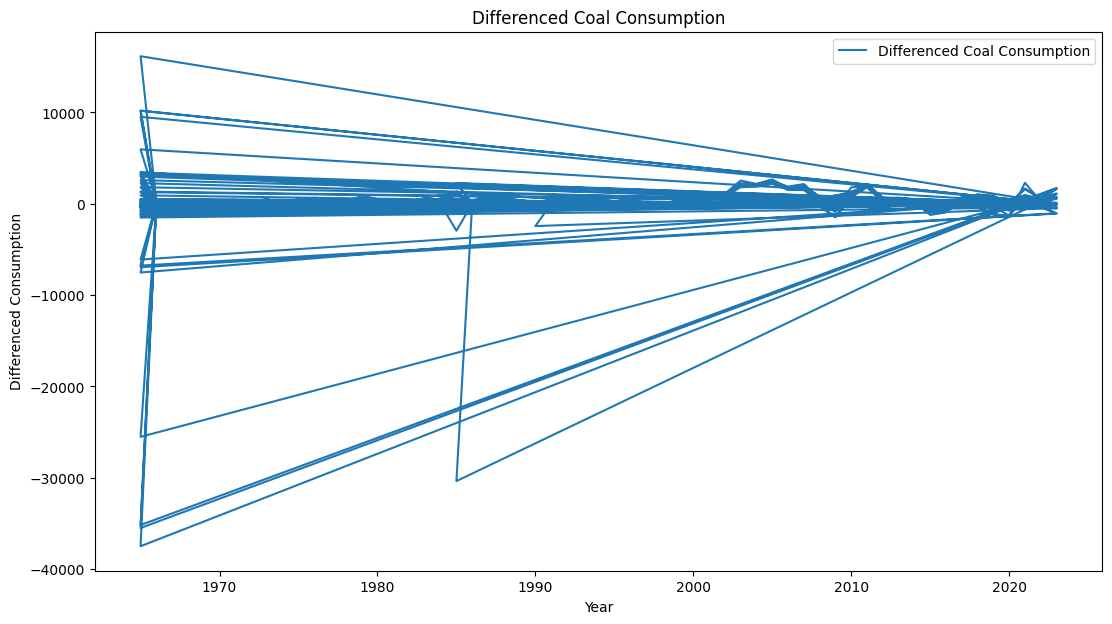

In [13]:
# Check for stationarity using ADF (Augumented Dickey-Fuller) test
adf_test = adfuller(time_series)
print("ADF Test Results:")
print(f"p-value: {adf_test[1]}")

if adfuller(time_series)[1] <= 0.05:
    print("\033[1mTHE DATA IS STATIONARY.\033[0m") 
else:
    print("\033[1mTHE DATA IS NOT STATIONARY, APPLYING DIFFERENCING...\033[0m") 

# Apply differencing if necessary
time_series_diff = time_series.diff().dropna()

# Plot differenced data
plt.figure(figsize=(13, 7))
plt.plot(time_series_diff, label="Differenced Coal Consumption")
plt.title("Differenced Coal Consumption")
plt.xlabel("Year")
plt.ylabel("Differenced Consumption")
plt.legend()
plt.show()

**BLOCK 7**

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\KARTHIKEYA\Desktop\Mini Project\Datasets\COAL Consumption.xlsx")

# Print the first few rows to check column names
print(df.head())

# Ensure the column names match your dataset
df.rename(columns=lambda x: x.strip(), inplace=True)  # Strip any extra spaces in column names

# Assign time series data
india_data = df  # Assigning to a variable for consistency
time_series = india_data["Coal consumption - TWh"]


   Entity  Year  Coal consumption - TWh
0  Africa  1965               323.49615
1  Africa  1966               323.12220
2  Africa  1967               330.29156
3  Africa  1968               343.51290
4  Africa  1969               346.64288


In [69]:
# TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP 
# import pandas as pd

# # Load the dataset
# file_path = r"C:\Users\KARTHIKEYA\Desktop\Mini Project\Datasets\COAL Consumption.xlsx"
# df = pd.read_excel(file_path)

# # Clean column names (strip spaces)
# df.columns = df.columns.str.strip()

# # Ensure the correct column name is used
# column_name = "Coal consumption - TWh"  # Adjust if needed
# if column_name not in df.columns:
#     print(f"Column '{column_name}' not found. Available columns: {df.columns}")
#     exit()

# # Assign time series data
# time_series = df[column_name].dropna()


**BLOCK 8**

In [80]:
# Fit ARIMA model
p, d, q = 1, 2, 1  # Example parameters (can be tuned)
arima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(0, 0, 0, 0))
arima_results = arima_model.fit()

# Summary of ARIMA model
print(arima_results.summary())

# Forecast next 5 years using ARIMA
forecast_arima = arima_results.get_forecast(steps=5)
forecast_values_arima = forecast_arima.predicted_mean
confidence_intervals_arima = forecast_arima.conf_int()

                                 SARIMAX Results                                  
Dep. Variable:     Coal consumption - TWh   No. Observations:                 5521
Model:                   SARIMAX(1, 2, 1)   Log Likelihood              -46480.771
Date:                    Fri, 14 Feb 2025   AIC                          92967.543
Time:                            23:44:06   BIC                          92987.390
Sample:                                 0   HQIC                         92974.464
                                   - 5521                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0076      0.035     -0.220      0.826      -0.076       0.060
ma.L1         -0.9999      0.005   -213.604      0.000      -1.009      -0.991
sigma2      1.209e+0

**BLOCK 9**

In [87]:
# Fit SARIMA model
P, D, Q, s = 1, 1, 1, 2  # Example seasonal parameters (can be tuned)
sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Summary of SARIMA model
print(sarima_results.summary())

# Forecast next 5 years using SARIMA
forecast_sarima = sarima_results.get_forecast(steps=5)
forecast_values_sarima = forecast_sarima.predicted_mean
confidence_intervals_sarima = forecast_sarima.conf_int()

                                     SARIMAX Results                                     
Dep. Variable:            Coal consumption - TWh   No. Observations:                 5521
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 2)   Log Likelihood              -46488.942
Date:                           Fri, 14 Feb 2025   AIC                          92987.885
Time:                                   23:46:25   BIC                          93020.963
Sample:                                        0   HQIC                         92999.421
                                          - 5521                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0074      0.033     -0.223      0.824      -0.072       0.057
ma.L1         -1.0000      0.833     -1.201

**BLOCK 10**

In [128]:
# Print forecasts (ALL COUNTRIES)
print("\nARIMA Forecast for Next 5 Years:")
print(forecast_values_arima)
print("\nSARIMA Forecast for Next 5 Years:")
print(forecast_values_sarima)


ARIMA Forecast for Next 5 Years:
5521    45569.594535
5522    45579.532620
5523    45589.430468
5524    45599.328623
5525    45609.226775
Name: predicted_mean, dtype: float64

SARIMA Forecast for Next 5 Years:
2024-01-01    45947.859348
2025-01-01    46691.167951
2026-01-01    47111.347328
2027-01-01    47886.204829
2028-01-01    48319.895327
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [111]:
# TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP TEMP 
# import matplotlib.pyplot as plt

# # Generate future years for plotting
# future_years = pd.date_range(start=time_series.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')

# plt.figure(figsize=(10, 6))
# plt.plot(time_series, label="Historical Data")
# plt.plot(future_years, forecast_values_arima, label="ARIMA Forecast", linestyle="--")
# plt.plot(future_years, forecast_values_sarima, label="SARIMA Forecast", linestyle=":")
# plt.fill_between(future_years, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='gray', alpha=0.2)
# plt.fill_between(future_years, confidence_intervals_sarima.iloc[:, 0], confidence_intervals_sarima.iloc[:, 1], color='blue', alpha=0.2)
# plt.title(f"{entity} Coal Consumption Forecast")
# plt.xlabel("Year")
# plt.ylabel("Coal Consumption (TWh)")
# plt.legend()
# plt.show()

**BLOCK 11**

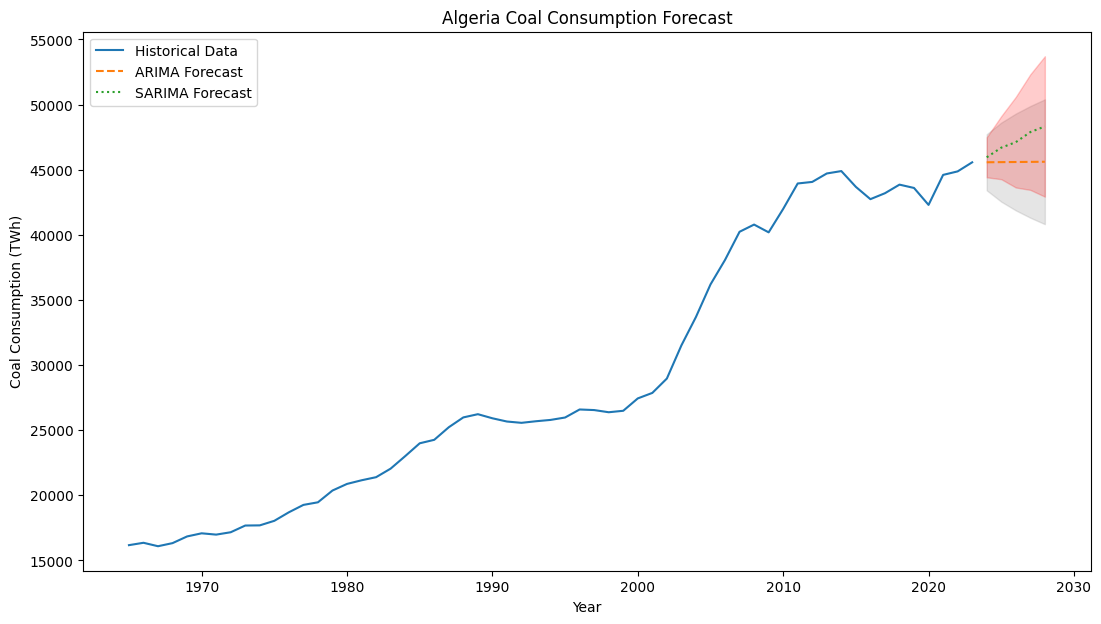

In [134]:
# Assuming you have loaded your data and filtered for a SPECIFIC COUNTRY
entity = "Algeria"

# Your existing code for loading, preprocessing, and fitting models...

# Forecast next 5 years using ARIMA
forecast_arima = arima_results.get_forecast(steps=5)
forecast_values_arima = forecast_arima.predicted_mean
confidence_intervals_arima = forecast_arima.conf_int()

# Forecast next 5 years using SARIMA
forecast_sarima = sarima_results.get_forecast(steps=5)
forecast_values_sarima = forecast_sarima.predicted_mean
confidence_intervals_sarima = forecast_sarima.conf_int()

# Generate future years for plotting
future_years = pd.date_range(
    start=time_series.index[-1] + pd.offsets.YearBegin(), 
    periods=5, 
    freq='YS'
)

# Plot forecasts
plt.figure(figsize=(13, 7))
plt.plot(time_series, label="Historical Data")
plt.plot(future_years, forecast_values_arima, label="ARIMA Forecast", linestyle="--")
plt.plot(future_years, forecast_values_sarima, label="SARIMA Forecast", linestyle=":")
plt.fill_between(future_years, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='gray', alpha=0.2)
plt.fill_between(future_years, confidence_intervals_sarima.iloc[:, 0], confidence_intervals_sarima.iloc[:, 1], color='red', alpha=0.2)
plt.title(f"{entity} Coal Consumption Forecast")
plt.xlabel("Year")
plt.ylabel("Coal Consumption (TWh)")
plt.legend()
plt.show()

**WHOLE CODE FOR ANY RANDOM COUNTRY REPORT GENERATION**

**BLOCK 12**

   Entity  Year  Coal consumption - TWh
0  Africa  1965               323.49615
1  Africa  1966               323.12220
2  Africa  1967               330.29156
3  Africa  1968               343.51290
4  Africa  1969               346.64288


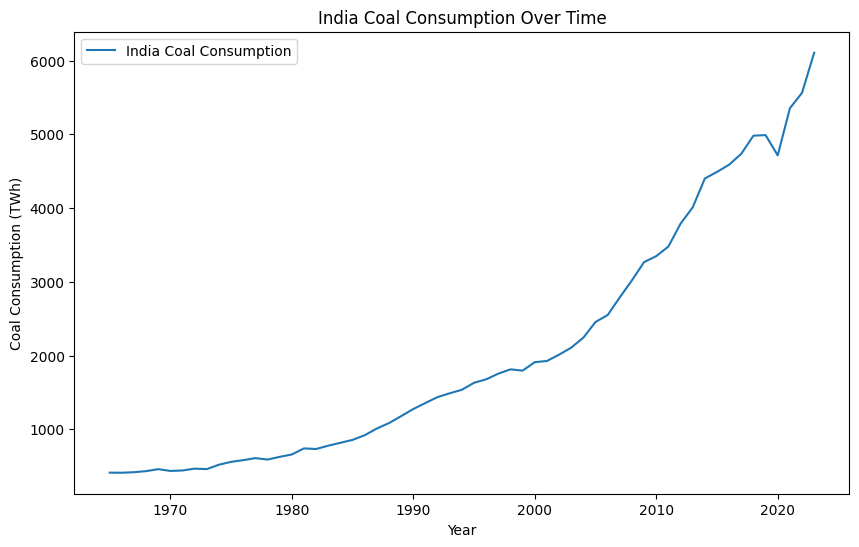

ADF Test Results:
p-value: 1.0
The data is non-stationary. Applying differencing...


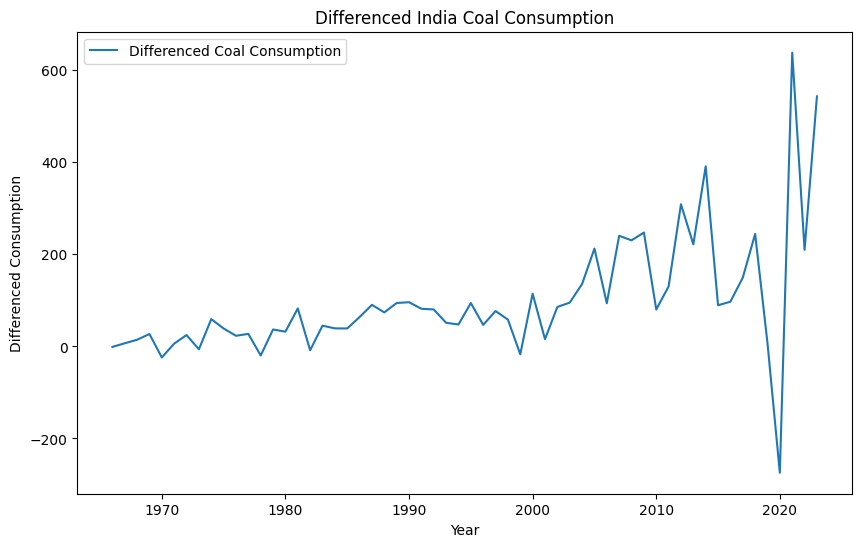

C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                 SARIMAX Results                                  
Dep. Variable:     Coal consumption - TWh   No. Observations:                   59
Model:                   SARIMAX(1, 1, 1)   Log Likelihood                -362.543
Date:                    Sat, 15 Feb 2025   AIC                            731.087
Time:                            00:37:01   BIC                            737.268
Sample:                        01-01-1965   HQIC                           733.495
                             - 01-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9927      0.017     60.113      0.000       0.960       1.025
ma.L1         -0.8489      0.068    -12.493      0.000      -0.982      -0.716
sigma2      1.527e+0

C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:            Coal consumption - TWh   No. Observations:                   59
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood                -349.252
Date:                           Sat, 15 Feb 2025   AIC                            708.505
Time:                                   00:37:02   BIC                            718.631
Sample:                               01-01-1965   HQIC                           712.431
                                    - 01-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9907     12.344     -0.080      0.936     -25.185      23.204
ma.L1          0.9977     25.259      0.039

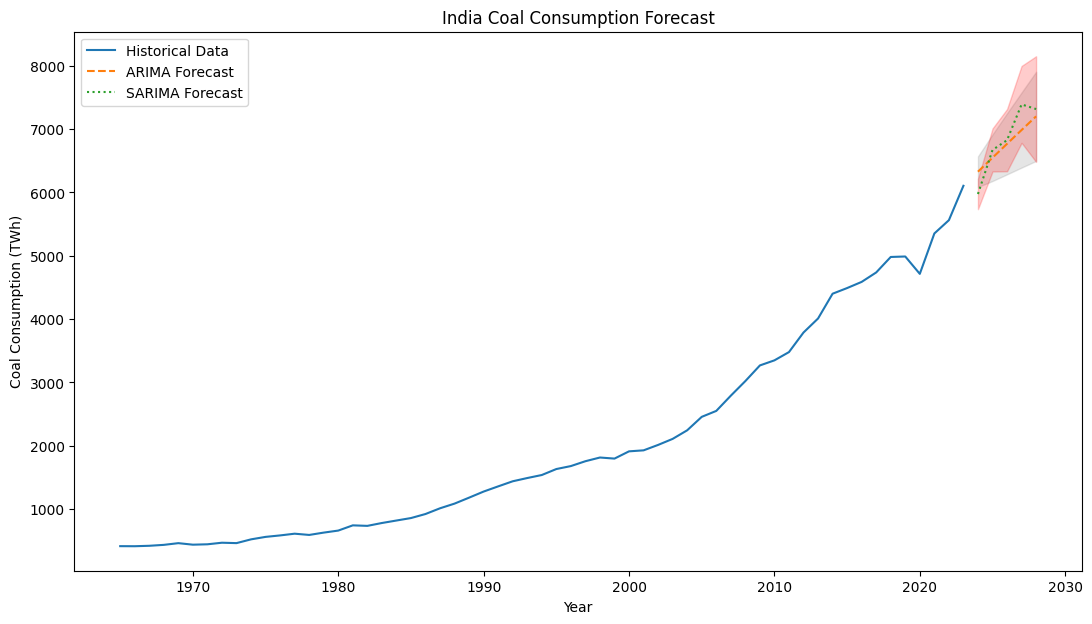

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
# file_path = "3c681988-d6d8-4378-ba4c-2486974e9c91_COAL Consumption.xlsx"
# sheet_name = "coal-consumption-by-country-ter"
# data = pd.read_excel(file_path, sheet_name=sheet_name)

data = pd.read_excel(r"C:\Users\KARTHIKEYA\Desktop\Mini Project\Datasets\COAL Consumption.xlsx", sheet_name = "coal-consumption-by-country-ter")

# Display the first few rows of the dataset
print(data.head())

# Function to preprocess and analyze data for a given entity
def analyze_entity(entity):
    # Filter data for the specific entity
    entity_data = data[data['Entity'] == entity].copy()
    
    # Ensure 'Year' is datetime and set as index
    entity_data['Year'] = pd.to_datetime(entity_data['Year'], format='%Y')
    entity_data.set_index('Year', inplace=True)
    
    # Extract the coal consumption column
    time_series = entity_data['Coal consumption - TWh']
    
    # Check if there is enough data to proceed
    if len(time_series) < 20:
        print(f"Not enough data for {entity}. Please select another country.")
        return
    
    # Visualize the data
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label=f"{entity} Coal Consumption")
    plt.title(f"{entity} Coal Consumption Over Time")
    plt.xlabel("Year")
    plt.ylabel("Coal Consumption (TWh)")
    plt.legend()
    plt.show()
    
    # Check for stationarity using ADF test
    adf_test = adfuller(time_series)
    print("ADF Test Results:")
    print(f"p-value: {adf_test[1]}")
    if adf_test[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary. Applying differencing...")
        
    # Apply differencing if necessary
    time_series_diff = time_series.diff().dropna()
    
    # Plot differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_diff, label="Differenced Coal Consumption")
    plt.title(f"Differenced {entity} Coal Consumption")
    plt.xlabel("Year")
    plt.ylabel("Differenced Consumption")
    plt.legend()
    plt.show()
    
    # Fit ARIMA model
    p, d, q = 1, 1, 1  # Example parameters (can be tuned)
    arima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(0, 0, 0, 0))
    arima_results = arima_model.fit()
    
    # Summary of ARIMA model
    print(arima_results.summary())
    
    # Forecast next 5 years using ARIMA
    forecast_arima = arima_results.get_forecast(steps=5)
    forecast_values_arima = forecast_arima.predicted_mean
    confidence_intervals_arima = forecast_arima.conf_int()
    
    # Fit SARIMA model
    P, D, Q, s = 1, 1, 1, 2  # Example seasonal parameters (can be tuned)
    sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_results = sarima_model.fit()
    
    # Summary of SARIMA model
    print(sarima_results.summary())
    
    # Forecast next 5 years using SARIMA
    forecast_sarima = sarima_results.get_forecast(steps=5)
    forecast_values_sarima = forecast_sarima.predicted_mean
    confidence_intervals_sarima = forecast_sarima.conf_int()
    
    # Generate future years for plotting
    future_years = pd.date_range(
        start=time_series.index[-1] + pd.offsets.YearBegin(), 
        periods=5, 
        freq='YS'
    )
    
    # Plot forecasts
    plt.figure(figsize=(13, 7))
    plt.plot(time_series, label="Historical Data")
    plt.plot(future_years, forecast_values_arima, label="ARIMA Forecast", linestyle="--")
    plt.plot(future_years, forecast_values_sarima, label="SARIMA Forecast", linestyle=":")
    plt.fill_between(future_years, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='gray', alpha=0.2)
    plt.fill_between(future_years, confidence_intervals_sarima.iloc[:, 0], confidence_intervals_sarima.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f"{entity} Coal Consumption Forecast")
    plt.xlabel("Year")
    plt.ylabel("Coal Consumption (TWh)")
    plt.legend()
    plt.show()

# Example usage: Analyze data for India
entity = "India"
analyze_entity(entity)

**WHOLE CODE FOR ANY RANDOM COUNTRY REPORT GENERATION WITH EVALUATION METRICS (MAE, RMSE, MAPE)**

**BLOCK 13**

   Entity  Year  Coal consumption - TWh
0  Africa  1965               323.49615
1  Africa  1966               323.12220
2  Africa  1967               330.29156
3  Africa  1968               343.51290
4  Africa  1969               346.64288


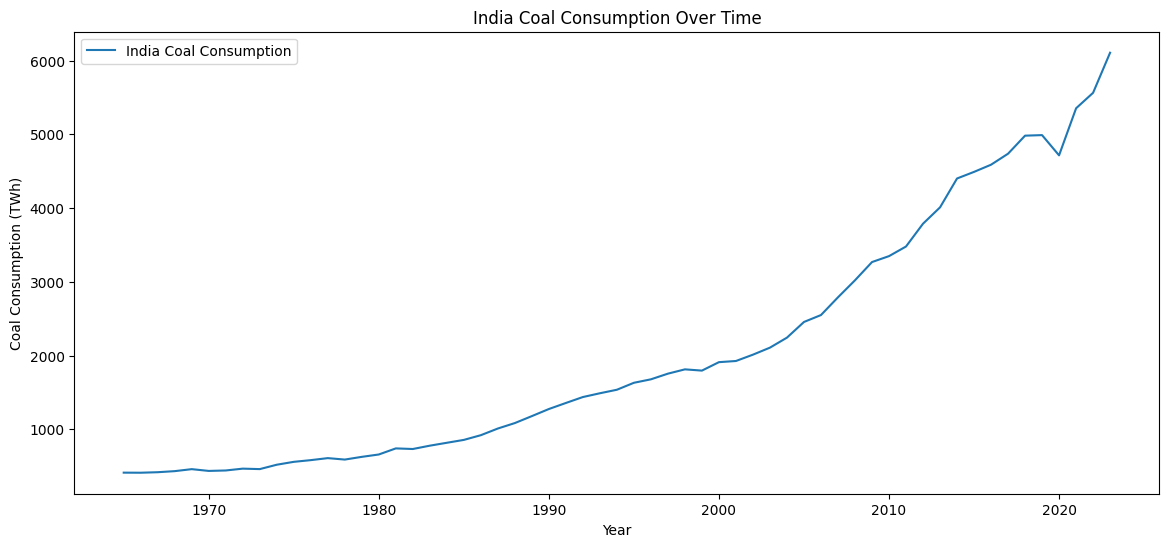

ADF Test Results:
p-value: 1.0
The data is non-stationary. Applying differencing...


C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                 SARIMAX Results                                  
Dep. Variable:     Coal consumption - TWh   No. Observations:                   59
Model:                   SARIMAX(1, 1, 1)   Log Likelihood                -362.543
Date:                    Sat, 15 Feb 2025   AIC                            731.087
Time:                            11:08:19   BIC                            737.268
Sample:                        01-01-1965   HQIC                           733.495
                             - 01-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9927      0.017     60.113      0.000       0.960       1.025
ma.L1         -0.8489      0.068    -12.493      0.000      -0.982      -0.716
sigma2      1.527e+0

C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHIKEYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


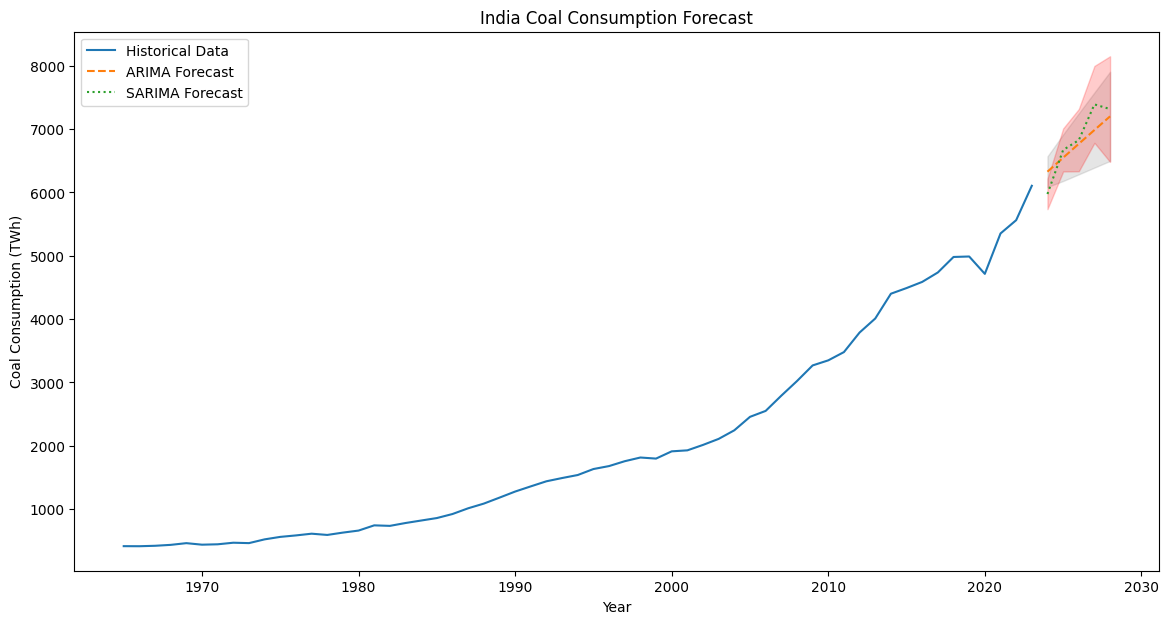

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_excel(r"C:\Users\KARTHIKEYA\Desktop\Mini Project\Datasets\COAL Consumption.xlsx", sheet_name = "coal-consumption-by-country-ter")


# Display the first few rows of the dataset
print(data.head())

# Function to preprocess and analyze data for a given entity
def analyze_entity(entity):
    # Filter data for the specific entity
    entity_data = data[data['Entity'] == entity].copy()
    
    # Ensure 'Year' is datetime and set as index
    entity_data['Year'] = pd.to_datetime(entity_data['Year'], format='%Y')
    entity_data.set_index('Year', inplace=True)
    
    # Extract the coal consumption column
    time_series = entity_data['Coal consumption - TWh']
    
    # Check if there is enough data to proceed
    if len(time_series) < 20:
        print(f"Not enough data for {entity}. Please select another country.")
        return
    
    # Visualize the data
    plt.figure(figsize=(14, 6))
    plt.plot(time_series, label=f"{entity} Coal Consumption")
    plt.title(f"{entity} Coal Consumption Over Time")
    plt.xlabel("Year")
    plt.ylabel("Coal Consumption (TWh)")
    plt.legend()
    plt.show()
    
    # Check for stationarity using ADF test
    adf_test = adfuller(time_series)
    print("ADF Test Results:")
    print(f"p-value: {adf_test[1]}")
    if adf_test[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary. Applying differencing...")
        
    # Apply differencing if necessary
    time_series_diff = time_series.diff().dropna()
    
    # Fit ARIMA model
    p, d, q = 1, 1, 1  # Example parameters (can be tuned)
    arima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(0, 0, 0, 0))
    arima_results = arima_model.fit()
    
    # Summary of ARIMA model
    print(arima_results.summary())
    
    # Forecast next 5 years using ARIMA
    forecast_arima = arima_results.get_forecast(steps=5)
    forecast_values_arima = forecast_arima.predicted_mean
    confidence_intervals_arima = forecast_arima.conf_int()
    
    # Fit SARIMA model
    P, D, Q, s = 1, 1, 1, 2  # Example seasonal parameters (can be tuned)
    sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_results = sarima_model.fit()
    
    # Summary of SARIMA model
    print(sarima_results.summary())
    
    # Forecast next 5 years using SARIMA
    forecast_sarima = sarima_results.get_forecast(steps=5)
    forecast_values_sarima = forecast_sarima.predicted_mean
    confidence_intervals_sarima = forecast_sarima.conf_int()
    
    # Calculate performance metrics
    actual_values = time_series.values
    forecast_values_arima = forecast_values_arima.values
    forecast_values_sarima = forecast_values_sarima.values
    
    # Mean Absolute Error (MAE) for ARIMA and SARIMA
    mae_arima = np.mean(np.abs(actual_values[-len(forecast_values_arima):] - forecast_values_arima))
    mae_sarima = np.mean(np.abs(actual_values[-len(forecast_values_sarima):] - forecast_values_sarima))
    
    # Root Mean Squared Error (RMSE) for ARIMA and SARIMA
    rmse_arima = np.sqrt(np.mean((actual_values[-len(forecast_values_arima):] - forecast_values_arima) ** 2))
    rmse_sarima = np.sqrt(np.mean((actual_values[-len(forecast_values_sarima):] - forecast_values_sarima) ** 2))
    
    # Mean Absolute Percentage Error (MAPE) for ARIMA and SARIMA
    mape_arima = np.mean(np.abs((actual_values[-len(forecast_values_arima):] - forecast_values_arima) / actual_values[-len(forecast_values_arima):]) * 100)
    mape_sarima = np.mean(np.abs((actual_values[-len(forecast_values_sarima):] - forecast_values_sarima) / actual_values[-len(forecast_values_sarima):]) * 100)
    
    # Calculate performance metrics as percentages
    total_actual_sum = np.sum(actual_values)
    mae_arima_percentage = (mae_arima / total_actual_sum) * 100
    rmse_arima_percentage = (rmse_arima / total_actual_sum) * 100
    mape_arima_percentage = mape_arima / 100
    
    mae_sarima_percentage = (mae_sarima / total_actual_sum) * 100
    rmse_sarima_percentage = (rmse_sarima / total_actual_sum) * 100
    mape_sarima_percentage = mape_sarima / 100
    
    # Print performance metrics
    print("\nPerformance Metrics for ARIMA:")
    print(f"MAE (Percentage): {mae_arima_percentage:.2f}%")
    print(f"RMSE (Percentage): {rmse_arima_percentage:.2f}%")
    print(f"MAPE (Percentage): {mape_arima_percentage:.2f}%")
    
    print("\nPerformance Metrics for SARIMA:")
    print(f"MAE (Percentage): {mae_sarima_percentage:.2f}%")
    print(f"RMSE (Percentage): {rmse_sarima_percentage:.2f}%")
    print(f"MAPE (Percentage): {mape_sarima_percentage:.2f}%")
    
    # Generate future years for plotting
    future_years = pd.date_range(
        start=time_series.index[-1] + pd.offsets.YearBegin(), 
        periods=5, 
        freq='YS'
    )
    
    # Plot forecasts
    plt.figure(figsize=(14, 7))
    plt.plot(time_series, label="Historical Data")
    plt.plot(future_years, forecast_values_arima, label="ARIMA Forecast", linestyle="--")
    plt.plot(future_years, forecast_values_sarima, label="SARIMA Forecast", linestyle=":")
    plt.fill_between(future_years, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='gray', alpha=0.2)
    plt.fill_between(future_years, confidence_intervals_sarima.iloc[:, 0], confidence_intervals_sarima.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f"{entity} Coal Consumption Forecast")
    plt.xlabel("Year")
    plt.ylabel("Coal Consumption (TWh)")
    plt.legend()
    plt.show()

# Example usage: Analyze data for India
entity = "India"
analyze_entity(entity)